In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_main = pd.read_csv(r'kidney_disease_dataset.csv')

In [3]:

df_risk = df_main[df_main['Target'].isin(['Moderate_Risk', 'High_Risk', 'Severe_Disease'])]
df_noRisk = df_main[df_main['Target'] == 'No_Disease'].sample(n=830, random_state=42)
df_lowRisk = df_main[df_main['Target'] == 'Low_Risk'].sample(n=830, random_state=42)


df_balanced = pd.concat([df_risk, df_noRisk, df_lowRisk], ignore_index=True)


df_balanced = df_balanced.sample(frac=1, random_state=44).reset_index(drop=True)


df_balanced.to_csv('equal_data.csv', index=False)


In [4]:
df_balanced.shape

(3712, 43)

In [5]:
object_columns = [
    'Red blood cells in urine','Pus cells in urine','Pus cell clumps in urine','Bacteria in urine','Hypertension (yes/no)',
    'Diabetes mellitus (yes/no)','Coronary artery disease (yes/no)','Appetite (good/poor)','Pedal edema (yes/no)','Anemia (yes/no)',
    'Family history of chronic kidney disease','Smoking status','Physical activity level','Urinary sediment microscopy results'
]

In [6]:
from sklearn.preprocessing import LabelEncoder
def label_encode_object_columns(df_balanced,save_path='label_encoders'):
    df_encoded = df_balanced.copy()
    label_encoders = {}

    

    for col in object_columns:
        LE = LabelEncoder()
        df_encoded[col] = LE.fit_transform(df_encoded[col].astype(str))
        label_encoders[col] = LE



    return df_encoded, label_encoders
df_encoded,label_encoder  = label_encode_object_columns(df_balanced)

In [7]:
df_encoded.shape

(3712, 43)

In [8]:
target_mapping = {
    'No_Disease': 0,
    'Low_Risk': 1,
    'Moderate_Risk': 2,
    'Severe_Disease': 3,
    'High_Risk': 4
}

df_encoded['Target'] = df_balanced['Target'].map(target_mapping)

In [9]:
df_encoded

,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Random blood glucose level (mg/dl),...,Smoking status,Body Mass Index (BMI),Physical activity level,Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,Urinary sediment microscopy results,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level,Target
0,15,174,1.010,0,1,1,1,0,1,359,...,0,25.3,1,25,2,2.36,0,6.72,9.79,0
1,9,143,1.007,4,0,0,0,0,1,245,...,0,35.0,1,3,6,1.21,1,0.42,6.01,0
2,57,170,1.018,4,4,0,1,0,0,384,...,0,21.7,0,10,15,2.29,0,0.74,6.08,0
3,43,105,1.013,1,5,0,1,0,1,117,...,1,20.3,0,23,16,0.59,0,1.01,12.35,4
4,34,115,1.023,4,3,1,1,0,0,350,...,0,19.8,1,23,18,1.68,1,0.88,9.33,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3707,46,170,1.013,4,1,0,1,1,0,311,...,1,29.6,2,14,6,2.45,1,2.79,11.66,2
3708,55,148,1.022,3,4,0,1,1,1,110,...,1,39.7,1,22,16,2.19,1,2.01,7.70,2
3709,12,136,1.018,1,5,1,0,0,1,211,...,0,19.0,0,21,13,1.10,0,0.15,0.65,0
3710,5,170,1.016,4,2,1,0,0,0,208,...,0,28.0,2,10,15,2.26,1,7.83,1.58,1


In [10]:
df_encoded['Target'].value_counts()

Target
0    830
1    830
4    821
2    821
3    410
Name: count, dtype: int64

<Axes: xlabel='Target', ylabel='count'>

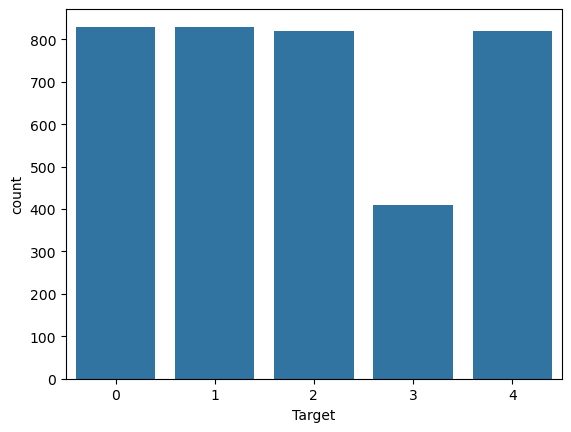

In [11]:
sns.countplot(data=df_encoded,x = df_encoded['Target'])

In [12]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3712 entries, 0 to 3711
Data columns (total 43 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Age of the patient                           3712 non-null   int64  
 1   Blood pressure (mm/Hg)                       3712 non-null   int64  
 2   Specific gravity of urine                    3712 non-null   float64
 3   Albumin in urine                             3712 non-null   int64  
 4   Sugar in urine                               3712 non-null   int64  
 5   Red blood cells in urine                     3712 non-null   int32  
 6   Pus cells in urine                           3712 non-null   int32  
 7   Pus cell clumps in urine                     3712 non-null   int32  
 8   Bacteria in urine                            3712 non-null   int32  
 9   Random blood glucose level (mg/dl)           3712 non-null   int64  
 10  

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2


X = df_encoded[object_columns]
y = df_encoded['Target']


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


chi2_stats, p_values = chi2(X_scaled, y)


chi2_df = pd.DataFrame({
    'Feature': object_columns,
    'Chi2 Statistic': chi2_stats,
    'p-value': p_values
}).sort_values(by='p-value')

chi2_df


,Feature,Chi2 Statistic,p-value
6,Coronary artery disease (yes/no),3.744977,0.441618
1,Pus cells in urine,3.031049,0.552643
9,Anemia (yes/no),2.164597,0.705516
7,Appetite (good/poor),2.097418,0.717847
12,Physical activity level,1.969122,0.741438
4,Hypertension (yes/no),1.837979,0.765527
10,Family history of chronic kidney disease,1.773420,0.777342
0,Red blood cells in urine,1.662731,0.797476
8,Pedal edema (yes/no),1.570118,0.814152
3,Bacteria in urine,1.233732,0.872514


In [14]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encode the target if it's not already numeric
df_encoded = df_balanced.copy()
df_encoded['Target'] = LabelEncoder().fit_transform(df_encoded['Target'])

# Select features and target
X = df_encoded.drop(columns=['Target'])
y = df_encoded['Target']

# If needed, encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Compute mutual information
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

# Create a DataFrame of results
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False).reset_index(drop=True)

# Display top features
mi_df.head(15)


,Feature,MI Score
0,Sodium level (mEq/L),0.026074
1,Sugar in urine,0.018624
2,Random blood glucose level (mg/dl),0.014663
3,Cholesterol level,0.014019
4,Red blood cell count (millions/cumm),0.012583
5,Cystatin C level,0.012555
6,Urinary sediment microscopy results_normal,0.009341
7,Smoking status_yes,0.009144
8,Duration of hypertension (years),0.007779
9,Body Mass Index (BMI),0.007630


In [15]:
top_features = mi_df[mi_df['MI Score'] > 0.01]['Feature'].tolist()
X_selected = X[top_features]
X_selected

,Sodium level (mEq/L),Sugar in urine,Random blood glucose level (mg/dl),Cholesterol level,Red blood cell count (millions/cumm),Cystatin C level
0,138.961843,1,359,107,3.5,2.36
1,128.960980,0,245,201,5.6,1.21
2,142.483127,4,384,157,4.9,2.29
3,122.285986,5,117,227,4.5,0.59
4,128.214722,3,350,245,5.6,1.68
...,...,...,...,...,...,...
3707,124.003156,1,311,111,4.3,2.45
3708,142.178247,4,110,121,2.9,2.19
3709,126.787015,5,211,139,4.8,1.10
3710,134.013406,2,208,177,2.9,2.26


In [2]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=90)
model.fit(X, y)

importances = model.feature_importances_
rf_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
rf_df = rf_df.sort_values(by='Importance', ascending=False)
rf_df.head(10)


NameError: name 'X' is not defined

In [17]:
from sklearn.feature_selection import f_classif

f_scores, p_values = f_classif(X, y)
anova_df = pd.DataFrame({'Feature': X.columns, 'F-Score': f_scores, 'p-value': p_values})
anova_df = anova_df.sort_values(by='F-Score', ascending=False)
anova_df.head(10)


,Feature,F-Score,p-value
12,White blood cell count (cells/cumm),2.526828,0.038837
34,Coronary artery disease (yes/no)_yes,1.907735,0.106315
24,Duration of hypertension (years),1.716535,0.143383
23,Duration of diabetes mellitus (years),1.667630,0.154608
4,Sugar in urine,1.614136,0.167797
29,Pus cells in urine_normal,1.454723,0.213326
9,Potassium level (mEq/L),1.410355,0.227808
19,Parathyroid hormone (PTH) level,1.334357,0.254616
17,Serum albumin level,1.332877,0.255164
18,Cholesterol level,1.285110,0.273403


In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=40)
rfe.fit(X, y)

rfe_df = pd.DataFrame({'Feature': X.columns, 'Selected': rfe.support_})
rfe_df[rfe_df['Selected'] == True]


,Feature,Selected
0,Age of the patient,True
1,Blood pressure (mm/Hg),True
2,Specific gravity of urine,True
3,Albumin in urine,True
4,Sugar in urine,True
6,Blood urea (mg/dl),True
7,Serum creatinine (mg/dl),True
8,Sodium level (mEq/L),True
9,Potassium level (mEq/L),True
10,Hemoglobin level (gms),True


In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

selected_features = [
    'Sugar in urine',
    'Pus cells in urine',
    'Serum phosphate level',
    'Serum albumin level',
    'White blood cell count (cells/cumm)',
    'Specific gravity of urine',
    'Serum creatinine (mg/dl)',
    'Duration of diabetes mellitus (years)',
    'Cystatin C level',
    'Estimated Glomerular Filtration Rate (eGFR)',
    'Random blood glucose level (mg/dl)',
    'Sodium level (mEq/L)',
    'Pedal edema (yes/no)'
]


X = df_scaled[selected_features]
y = df_scaled['Target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)

print("Random Forest Results (Selected Features):")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


NameError: name 'df_scaled' is not defined